# Introduction

We are going to create two model that are able to recognize hand written numbers. Those models are:
+ A neural network from scratch. This is the typical neural network use for this dataset.
+ A transfer learning. We are going to use a neural network starting with the weights of another neural network.

The second model, it would be an interesting case. Because we will need to rescale our data and create a new channel to it.
because the neural network that would use in the training set accept input of the shape: (224, 224, 3)
So We will have to tackle lots of problems in doing so.

We will going to analyze in case the model works well or not to learn from this experiment.


In [59]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from matplotlib.pyplot import imshow
from keras.layers import Input
import numpy as np
# Load the MNIST dataset
from sklearn.utils import shuffle


In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
x_train, y_train = shuffle(x_train,y_train, random_state=0)
x_test, y_test = shuffle(x_test,y_test, random_state=0)

number: 3


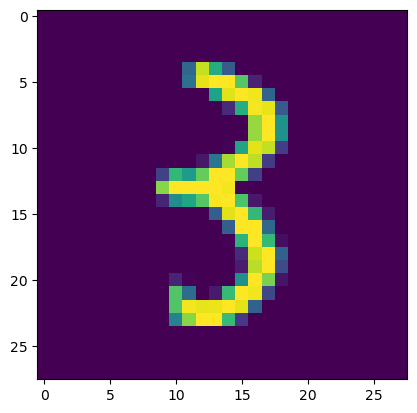

In [62]:
# Select an image index
image_index = 0
# Show the image
print(f"number: {y_train[image_index]}")
imshow(x_train[image_index])


In [63]:
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_train.shape: {y_train}")

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
y_train.shape: [3 6 6 ... 7 1 4]


In [64]:
# Preprocess the data
x_train = x_train.reshape(60000, 28, 28, 1)  # Add a channel dimension for grayscale images
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32') / 255  # Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = keras.utils.to_categorical(y_test, 10)


In [65]:
# what we did 
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_train.shape: {y_train}")

x_train.shape: (60000, 28, 28, 1)
y_train.shape: (60000, 10)
y_train.shape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Without transfer learning

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [9]:
tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [10]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to prevent overfitting
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (digits 0-9)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),
                    callbacks=[tensorboard,reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


C:\Users\Rober\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8203 - loss: 0.5952 - val_accuracy: 0.9731 - val_loss: 0.0916 - learning_rate: 0.0010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9591 - loss: 0.1372 - val_accuracy: 0.9803 - val_loss: 0.0589 - learning_rate: 0.0010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9695 - loss: 0.0998 - val_accuracy: 0.9831 - val_loss: 0.0511 - learning_rate: 0.0010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9757 - loss: 0.0826 - val_accuracy: 0.9830 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9777 - loss: 0.0709 - val_accuracy: 0.9859 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9798 - loss: 0.0613 - val_accuracy: 0.9857 - val_loss: 0.0410 - learning_rate: 0.0010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9823 - loss: 0.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 26, 26, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 13, 13, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 13, 13, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 5408)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 128)                   │     692,352 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 128)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

# With transfer learning

In [12]:
#pip install opencv-python

In [13]:
from keras.models import Model
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
#base_model = VGG19(weights='imagenet')

In [14]:
from keras.models import Model
from keras.applications.mobilenet import preprocess_input
from keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet')

In [15]:
#checkpoint = ModelCheckpoint("VGG19.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

In [16]:
base_model.trainable = False

In [17]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv1 (Conv2D)                     │ (None, 112, 112, 32)          │         864 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv1_bn (BatchNormalization)      │ (None, 112, 112, 32)          │         128 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv1_relu (ReLU)                  │ (None, 112, 112, 32)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_1 (DepthwiseConv2D)        │ (None, 112, 112, 32)          │         288 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_1_bn (BatchNormalization)  │ (None, 112, 112, 32)          │         128 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_1_relu (ReLU)              │ (None, 112, 112, 32)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_1 (Conv2D)                 │ (None, 112, 112, 64)          │       2,048 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_1_bn (BatchNormalization)  │ (None, 112, 112, 64)          │         256 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_1_relu (ReLU)              │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pad_2 (ZeroPadding2D)         │ (None, 113, 113, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_2 (DepthwiseConv2D)        │ (None, 56, 56, 64)            │         576 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_2_bn (BatchNormalization)  │ (None, 56, 56, 64)            │         256 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_2_relu (ReLU)              │ (None, 56, 56, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_2 (Conv2D)                 │ (None, 56, 56, 128)           │       8,192 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_2_bn (BatchNormalization)  │ (None, 56, 56, 128)           │         512 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_2_relu (ReLU)              │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_3 (DepthwiseConv2D)        │ (None, 56, 56, 128)           │       1,152 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_3_bn (BatchNormalization)  │ (None, 56, 56, 128)           │         512 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_dw_3_relu (ReLU)              │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_3 (Conv2D)                 │ (None, 56, 56, 128)           │      16,384 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv_pw_3_bn (BatchNormalization)  │ (None, 56, 56, 128)           │         512 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ con

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,253,864 (16.23 MB)

In [18]:
import cv2

number: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


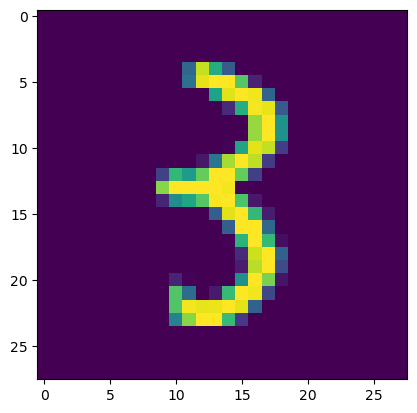

In [19]:
# Select an image index
image_index = 0
# Show the image
print(f"number: {y_train[image_index]}")
imshow(x_train[image_index])


In [20]:
x_train.shape

(60000, 28, 28, 1)

In [67]:
def rezising_images(X,image_size,add_channel = True,divide=10):
    new_X = []
    i = 0
    
    while i < (X.shape[0])/divide:
        img = cv2.resize(X[i],(image_size, image_size))
        if add_channel:
            img = cv2.merge((img, img, img))
        new_X.append(img)
        i = i + 1
    new_X = np.array(new_X, dtype='float32')   
    new_X = new_X.reshape(new_X.shape[0], new_X.shape[1], new_X.shape[2], new_X.shape[3])

    return new_X

In [68]:
# parametro
image_size = 224
x_train = rezising_images(x_train,image_size)
x_test = rezising_images(x_test,image_size)

In [69]:
x_train.shape

(6000, 224, 224, 3)

In [70]:
y_train = y_train[0:x_train.shape[0]]
y_test = y_test[0:x_test.shape[0]]

In [71]:
x_test.shape

(1000, 224, 224, 3)

number: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


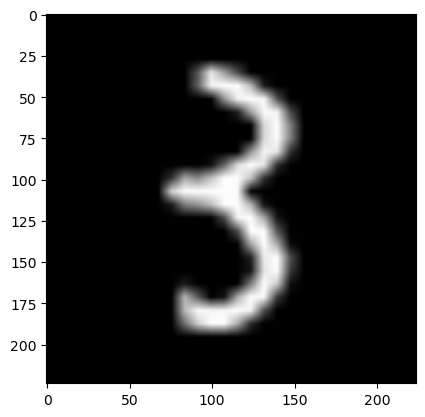

In [72]:
# Select an image index
image_index = 0
# Show the image
print(f"number: {y_train[image_index]}")
imshow(x_train[image_index])

In [73]:
# reziging so that I can use the pretrained model

In [74]:
# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (digits 0-9)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),
                   callbacks=[tensorboard,reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 991ms/step - accuracy: 0.1751 - loss: 2.2818 - val_accuracy: 0.3040 - val_loss: 2.2025 - learning_rate: 0.0010
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 966ms/step - accuracy: 0.3183 - loss: 2.1676 - val_accuracy: 0.4030 - val_loss: 2.0262 - learning_rate: 0.0010
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 974ms/step - accuracy: 0.3640 - loss: 2.0036 - val_accuracy: 0.4370 - val_loss: 1.8433 - learning_rate: 0.0010
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 970ms/step - accuracy: 0.4233 - loss: 1.8260 - val_accuracy: 0.4810 - val_loss: 1.7044 - learning_rate: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 970ms/step - accuracy: 0.4234 - loss: 1.7380 - val_accuracy: 0.4850 - val_loss: 1.6010 - learning_rate: 0.0010
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 966ms/step - accuracy: 0.4555 - loss: 1.6476 - val_accuracy: 0.5220 - val_loss: 1.5198 - learning_rate: 0.0010
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 967ms/step - accuracy: 0.4673 - loss: 1.

In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)    │ (None, 1000)                  │   4,253,864 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_4 (Flatten)                │ (None, 1000)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_8 (Dense)                    │ (None, 128)                   │     128,128 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ (None, 128)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_9 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 4,642,120 (17.71 MB)

 Trainable params: 129,418 (505.54 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

 Optimizer params: 258,838 (1011.09 KB)

So in this particular example the transfer learning didn't work some of the reason of why this happened are:
+ We have grey images so we couldn't take advantage of the color layers. In fact, here the only thing that is important is the shape. And the previous layer of the transfer learning were done considering picture with colors. 

+ We have to take out a lot of the training and testing data because we need to rescale and add an artificial channel to the data. That create much bigger arrays that slow all the process. In fact, for memory and computer power I took out only 1 in 100 samples of data.

+ The end result was that we trained 693,962 parameters in the first model vs 129,418 in the second one. Also please notice the significant amount of parameters in the second model are much higher than in the first one (because of non-trainable parames).

+ As you can see I try two differents models in the transfer learning, the first one was VGG19. The idea was discontinue because of how slow it works on my computer :( 

So, how to use transfer learning properly? 

**stayed tuned in the next notebook we will use transfer learning properly**
